# Modules Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

# Loading the Data

In [34]:
df_training_data = pd.read_csv(r'C:\Users\Maxime\Documents\Formation\Coding\ML\BCG Forage\Task 2\ml_case_training_data.csv')
df_training_hist_data = pd.read_csv(r'C:\Users\Maxime\Documents\Formation\Coding\ML\BCG Forage\Task 2\ml_case_training_hist_data.csv')
df_training_output = pd.read_csv(r'C:\Users\Maxime\Documents\Formation\Coding\ML\BCG Forage\Task 2\ml_case_training_output.csv')

In [4]:
df_training_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [5]:
df_training_hist_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
df_training_output.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


# 1. 1. Data Cleaning
## 1.1 - Training data

In [7]:
df_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [8]:
# We drop the columns with not enough values (~80% or more of the data missing)
df_training_data = df_training_data.drop(['campaign_disc_ele', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'activity_new'], axis = 1)

In [9]:
# Filling missing values

num_df = df_training_data[['forecast_discount_energy', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'margin_gross_pow_ele', 'net_margin', 'pow_max']]
categorical_df = df_training_data[['channel_sales', 'has_gas', 'origin_up']]

imputer_most_frequent = SimpleImputer(strategy = 'most_frequent')
imputer_median = SimpleImputer(strategy = 'median')

    ##Categorical values
df_training_data[['channel_sales', 'has_gas', 'origin_up']] = imputer_most_frequent.fit_transform(categorical_df)

    ##Numerical Values
df_training_data[['forecast_discount_energy', 
                  'forecast_price_energy_p1', 
                  'forecast_price_energy_p2', 
                  'forecast_price_pow_p1', 
                  'margin_gross_pow_ele', 
                  'net_margin', 
                  'pow_max']] = imputer_median.fit_transform(num_df)

In [10]:
#Another alternative would be to delete the row with NaN values as there is a small number of them.

sub = ['forecast_discount_energy', 
                  'forecast_price_energy_p1', 
                  'forecast_price_energy_p2', 
                  'forecast_price_pow_p1', 
                  'margin_gross_pow_ele', 
                  'net_margin', 
                  'pow_max']

df_training_data.dropna(subset = sub, inplace = True)

In [11]:
#Encoding of the categorical data

channel_sales = df_training_data[['channel_sales']]
is_gas_client = df_training_data[['has_gas']]
original_company_subscription = df_training_data[['origin_up']]

print(channel_sales.value_counts())
print('----------------------------------------------')
print(is_gas_client.value_counts())
print('----------------------------------------------')
print(channel_sales.value_counts())

channel_sales                   
foosdfpfkusacimwkcsosbicdxkicaua    11595
lmkebamcaaclubfxadlmueccxoimlema     2073
usilxuppasemubllopkaafesmlibmsdf     1444
ewpakwlliwisiwduibdlfmalxowmwpci      966
sddiedcslfslkckwlfkdpoeeailfpeds       12
epumfxlbckeskwekxbiuasklxalciiuu        4
fixdbufsefwooaasfcxdxadsiekoceaa        2
dtype: int64
----------------------------------------------
has_gas
f          13132
t           2964
dtype: int64
----------------------------------------------
channel_sales                   
foosdfpfkusacimwkcsosbicdxkicaua    11595
lmkebamcaaclubfxadlmueccxoimlema     2073
usilxuppasemubllopkaafesmlibmsdf     1444
ewpakwlliwisiwduibdlfmalxowmwpci      966
sddiedcslfslkckwlfkdpoeeailfpeds       12
epumfxlbckeskwekxbiuasklxalciiuu        4
fixdbufsefwooaasfcxdxadsiekoceaa        2
dtype: int64


In [12]:
categorical_encoder = OrdinalEncoder()
df_training_data[['channel_sales', 'has_gas', 'origin_up']] = categorical_encoder.fit_transform(df_training_data[['channel_sales', 'has_gas', 'origin_up']])

In [13]:
dates_columns = ['date_activ', 'date_end', 'date_first_activ', 'date_modif_prod', 'date_renewal']

df_training_data[dates_columns] = df_training_data[dates_columns].apply(pd.to_datetime)

## 1.2. Training Hist Data

In [14]:
df_training_hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [35]:
#There is enough data so we delete rows with Nan values

sub = list(df_training_hist_data.columns)[2:]
df_training_hist_data.dropna(subset = sub, inplace = True)

## 1.3 Training Outputs

In [16]:
df_training_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [17]:
df_training = pd.merge(df_training_data, df_training_output, on = 'id')

# 2. Data Visualization

In [18]:
df_training_output['churn'].value_counts()

0    14501
1     1595
Name: churn, dtype: int64

In [19]:
df_training.describe()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
count,16096.000000,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,...,16096.000000,16096.000000,16096.000000,16083.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,3.278516,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.983785,70.309945,0.135955,0.053211,...,0.184145,196.123447,22.461168,21.460318,1.347788,217.895415,5.030629,2.211046,20.602873,0.099093
std,1.050759,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.141470,79.023251,0.026157,0.048515,...,0.387615,494.366979,23.691341,27.917349,1.459808,366.583368,1.676101,0.853481,21.770587,0.298796
min,0.000000,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,...,0.000000,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,0.000000,1.000000,0.000000
25%,3.000000,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,...,0.000000,0.000000,12.025000,11.950000,1.000000,52.017500,4.000000,1.000000,12.500000,0.000000
50%,3.000000,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,...,0.000000,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,2.000000,13.856000,0.000000
75%,3.000000,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,...,0.000000,218.090000,29.640000,29.640000,1.000000,275.735000,6.000000,3.000000,19.800000,0.000000
max,6.000000,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,...,1.000000,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,4.000000,500.000000,1.000000


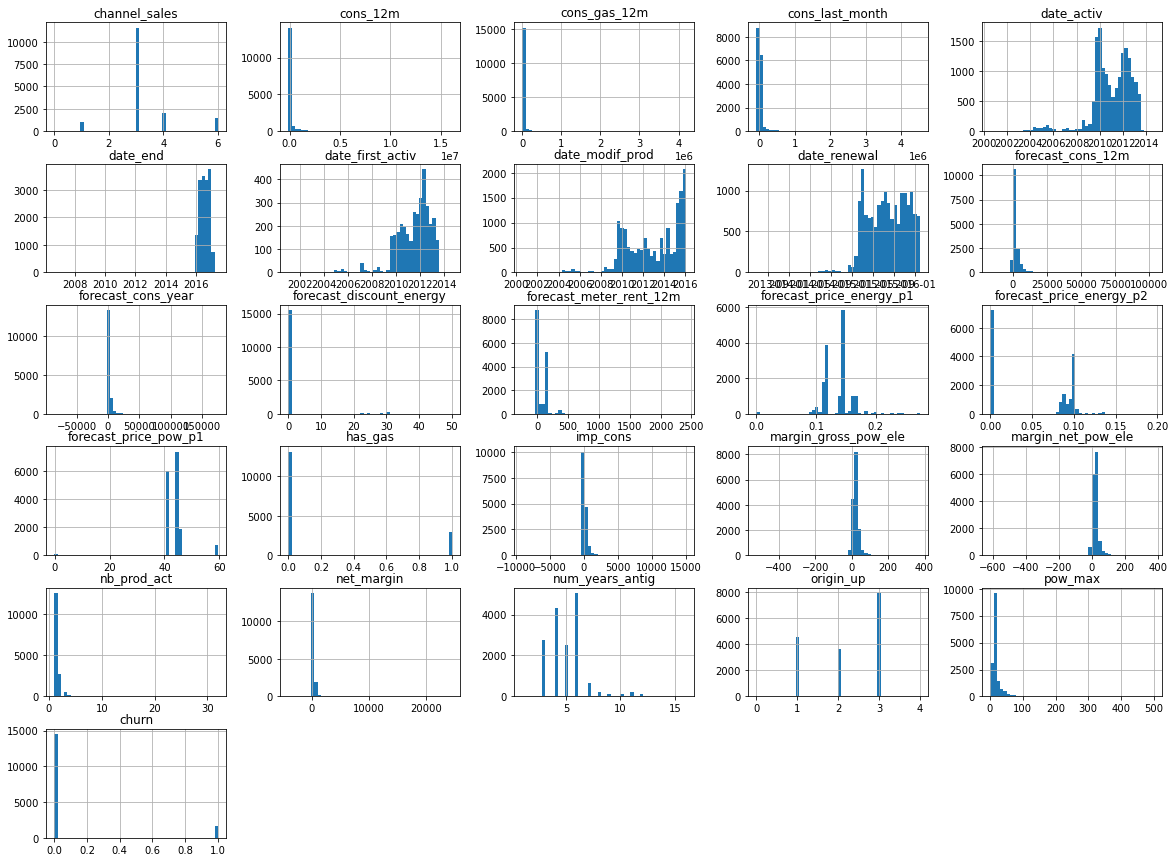

In [20]:
df_training.hist(bins=50, figsize=(20,15))
plt.show()

The distribution of most of the features is quite skewed. \
\
On top of that, we spot negative values which we could understand as energy being produces. We can think of clients having solar panels or other source of energy

# Correlation

In [21]:
corr_matrix = df_training.corr()
corr_matrix['churn'].sort_values()

num_years_antig            -0.071565
cons_12m                   -0.051759
cons_last_month            -0.046931
cons_gas_12m               -0.040880
has_gas                    -0.032033
nb_prod_act                -0.022609
channel_sales              -0.008358
forecast_price_energy_p1   -0.001432
forecast_cons_year          0.002756
imp_cons                    0.003417
forecast_price_pow_p1       0.005024
forecast_cons_12m           0.007395
pow_max                     0.009475
forecast_discount_energy    0.010833
net_margin                  0.029389
forecast_meter_rent_12m     0.029971
forecast_price_energy_p2    0.029979
margin_net_pow_ele          0.063187
margin_gross_pow_ele        0.080170
origin_up                   0.100714
churn                       1.000000
Name: churn, dtype: float64

Eventhough this gives us a little bit more information, the churn feature is a categorical feature. Thus, one must studied further the features to extract all of the information needed and to highlight the core features that will be used for our model

# Churn Percentage

In [22]:
print(df_training['churn'].value_counts()/df_training['churn'].shape[0]*100)
df1 = pd.DataFrame(df_training['churn'].value_counts()/df_training['churn'].shape[0]*100)

0    90.090706
1     9.909294
Name: churn, dtype: float64


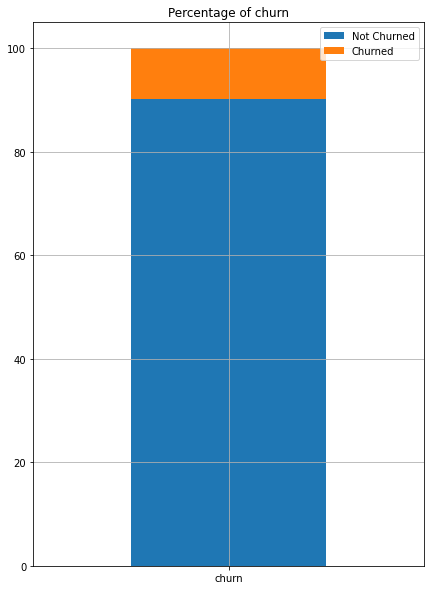

In [23]:
ax=df1.transpose().plot(kind="bar", stacked=True,figsize=(7, 10), rot = 0)
plt.legend(['Not Churned', 'Churned'])
plt.grid()
plt.title('Percentage of churn')
plt.show()

**90%** of the clients have maintained their contract while about **10%** of them has churned.

# Churn and Channel Sales

In [24]:
df2_ = df_training[['id', 'channel_sales', 'churn']]
total = df2_[['id', 'channel_sales']].groupby('channel_sales').count()

df2 = df2_[df2_['churn']==1].groupby(['channel_sales']).count()/total[total>100].dropna()*100  

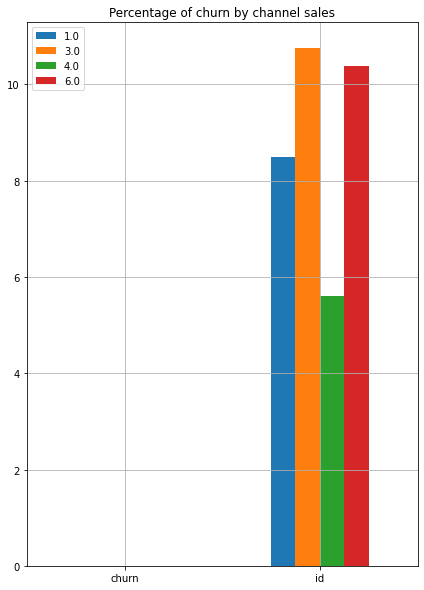

In [25]:
ax=df2.transpose().plot(kind="bar", stacked=False,figsize=(7, 10), rot = 0)
plt.legend(df2.reset_index()['channel_sales'])
plt.grid()
plt.title('Percentage of churn by channel sales')
plt.show()

The churn rate is **more correlated** with 3 of the sale channels.

# Gas Subscription

In [26]:
df3 = df_training[df_training['churn'] == 1][['id', 'has_gas', 'churn']]
df3 = df3.groupby(['has_gas', 'churn']).count()/df_training.shape[0]*100

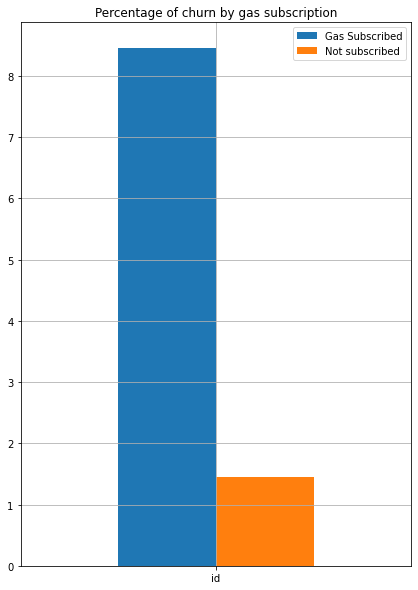

In [27]:
ax=df3.transpose().plot(kind="bar", stacked=False,figsize=(7, 10), rot = 0)
plt.legend(['Gas Subscribed', 'Not subscribed'])
plt.grid()
plt.title('Percentage of churn by gas subscription')
plt.show()

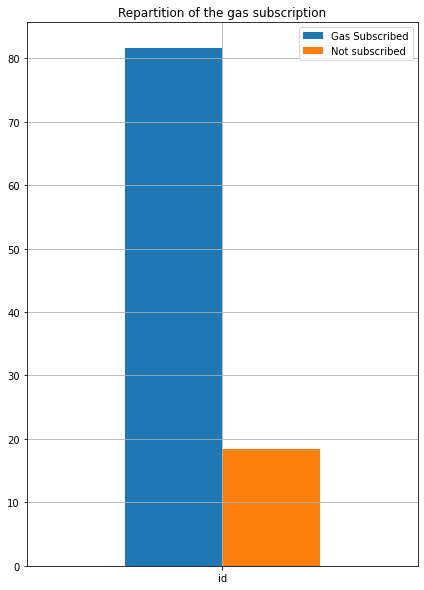

In [28]:
df4 = df_training[['id', 'has_gas']]
df4 = df4.groupby(['has_gas']).count()/df_training.shape[0]*100

ax=df4.transpose().plot(kind="bar", stacked=False,figsize=(7, 10), rot = 0)
plt.legend(['Gas Subscribed', 'Not subscribed'])
plt.grid()
plt.title('Repartition of the gas subscription')
plt.show()

We see there is no major difference in the repartition of the two features, which lead us to believe, the gas subscription is not as important as other features determined earlier.

# Consumption Temporal Features

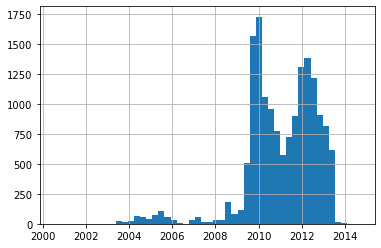

In [29]:
plt.hist(df_training['date_activ'], 50)
plt.grid()
plt.show()

C:\Users\Maxime\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Maxime\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


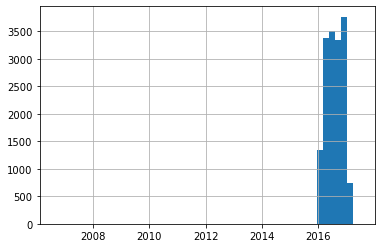

In [30]:
plt.hist(df_training['date_end'], 50)
plt.grid()
plt.show()

There is a lot more data visualization we could have done but to stay in the format of the exercise and to not go too much overtime we will stop here.
However, here is a few ideas to go further : 
- Look deeply into the date features and see if there is a specific event in time that causes churn. 
- Study the activity on the different scale of time and see if they reveal anything about the churn phenomenon.
- Procede similarly with the forecast.


In [36]:
df_training_hist_data.to_csv('training_data_hist.csv')